# 🌳 Módulo 2.3: Modelos No Lineales - Árboles de Decisión y SVM
### Curso: **Machine Learning con Python** (IFCD093PO)
**Duración estimada:** 12 horas

---

## 🎯 Objetivos del Módulo

El mundo no siempre es lineal. En este módulo, te adentrarás en el fascinante mundo de los modelos no lineales, capaces de capturar relaciones complejas en los datos. Dominarás dos de los algoritmos más influyentes y versátiles: los Árboles de Decisión y las Support Vector Machines (SVM).

Al finalizar, serás capaz de:

- ✅ Entrenar, visualizar e interpretar **Árboles de Decisión** para problemas de clasificación y regresión.
- ✅ Comprender los conceptos de impureza (Gini, Entropía) y ganancia de información.
- ✅ Identificar y mitigar el **overfitting** en los árboles mediante técnicas de poda (ej. `max_depth`).
- ✅ Entender la intuición detrás de las **Support Vector Machines (SVM)**: encontrar el hiperplano de margen máximo.
- ✅ Aplicar el **"truco del kernel"** (lineal, polinómico, RBF) para que las SVM puedan resolver problemas no lineales.
- ✅ Conocer los hiperparámetros clave de las SVM (`C`, `gamma`) y cómo afectan al modelo.

**¡Prepárate para tomar decisiones basadas en datos y encontrar los límites que separan tus clases!**

---

## 📚 Tabla de Contenidos

1. [Árboles de Decisión](#1-arboles)
   - [Intuición: Un Diagrama de Flujo para Predecir](#1.1-intuicion)
   - [¿Cómo Aprende un Árbol? Impureza y Ganancia de Información](#1.2-aprendizaje)
   - [Implementación de un Árbol de Clasificación](#1.3-implementacion-clas)
   - [Visualización del Árbol](#1.4-visualizacion)
   - [El Gran Problema: Overfitting y Poda](#1.5-overfitting)
   - [Árboles de Regresión](#1.6-regresion)
2. [Support Vector Machines (SVM)](#2-svm)
   - [Intuición: El Hiperplano de Margen Máximo](#2.1-intuicion-svm)
   - [Clasificadores de Margen Blando (Hiperparámetro C)](#2.2-margen-blando)
   - [Clasificación No Lineal: El Truco del Kernel](#2.3-kernel)
   - [Implementación de SVM con Kernels](#2.4-implementacion-svm)
   - [SVM para Regresión (SVR)](#2.5-svr)
3. [Ventajas y Desventajas: Árboles vs. SVM](#3-comparativa)
4. [Resumen y Próximos Pasos](#4-resumen)

---

## 🌳 1. Árboles de Decisión <a id='1-arboles'></a>

# 🤔 El Problema de la Linealidad

## MODELOS LINEALES (como regresión):
- Dibujan LÍNEAS RECTAS para separar datos
- Funcionan bien cuando los datos siguen patrones simples

## PROBLEMA:
¿Y si los datos tienen patrones como estos?

### 1.2 ¿Cómo Aprende un Árbol? Impureza y Ganancia de Información <a id='1.2-aprendizaje'></a>

El algoritmo del árbol (como CART o ID3) busca en cada paso la **mejor pregunta** a realizar. ¿Y cuál es la mejor pregunta? Aquella que **mejor separa los datos** en grupos más "puros".

**Impureza**: Una medida de cuán mezcladas están las clases en un nodo.
- Un nodo **puro** contiene solo muestras de una clase (impureza = 0).
- Un nodo **impuro** contiene una mezcla 50/50 de clases (máxima impureza).

Dos medidas comunes de impureza son:

1.  **Índice de Gini**: $ Gini = 1 - \sum_{k=1}^{n} p_k^2 $, donde $p_k$ es la proporción de muestras de la clase k.
2.  **Entropía**: $ Entropía = - \sum_{k=1}^{n} p_k \log_2(p_k) $

El algoritmo elige la característica y el umbral que producen la mayor **Ganancia de Información**, que es la reducción de la impureza después de la división.

### 1.3 Implementación de un Árbol de Clasificación <a id='1.3-implementacion-clas'></a>

Usaremos un dataset clásico, el de las flores Iris, para clasificar especies basándonos en las medidas de sus pétalos y sépalos.

In [8]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Cargar datos
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de árbol de decisión
# Usaremos 'gini' como criterio de impureza y dejaremos que el árbol crezca por ahora
tree_clf = DecisionTreeClassifier(criterion='gini', random_state=42)
tree_clf.fit(X_train, y_train)

# Evaluar
y_pred = tree_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"El dataset Iris tiene {X.shape[1]} características: {feature_names}")
print(f"Queremos predecir entre {len(target_names)} clases: {target_names}")
print(f"\nAccuracy del árbol de decisión: {accuracy:.2f}")

El dataset Iris tiene 4 características: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Queremos predecir entre 3 clases: ['setosa' 'versicolor' 'virginica']

Accuracy del árbol de decisión: 1.00


### 1.4 Visualización del Árbol <a id='1.4-visualizacion'></a>

La gran ventaja de los árboles es que podemos ver exactamente cómo toman las decisiones.

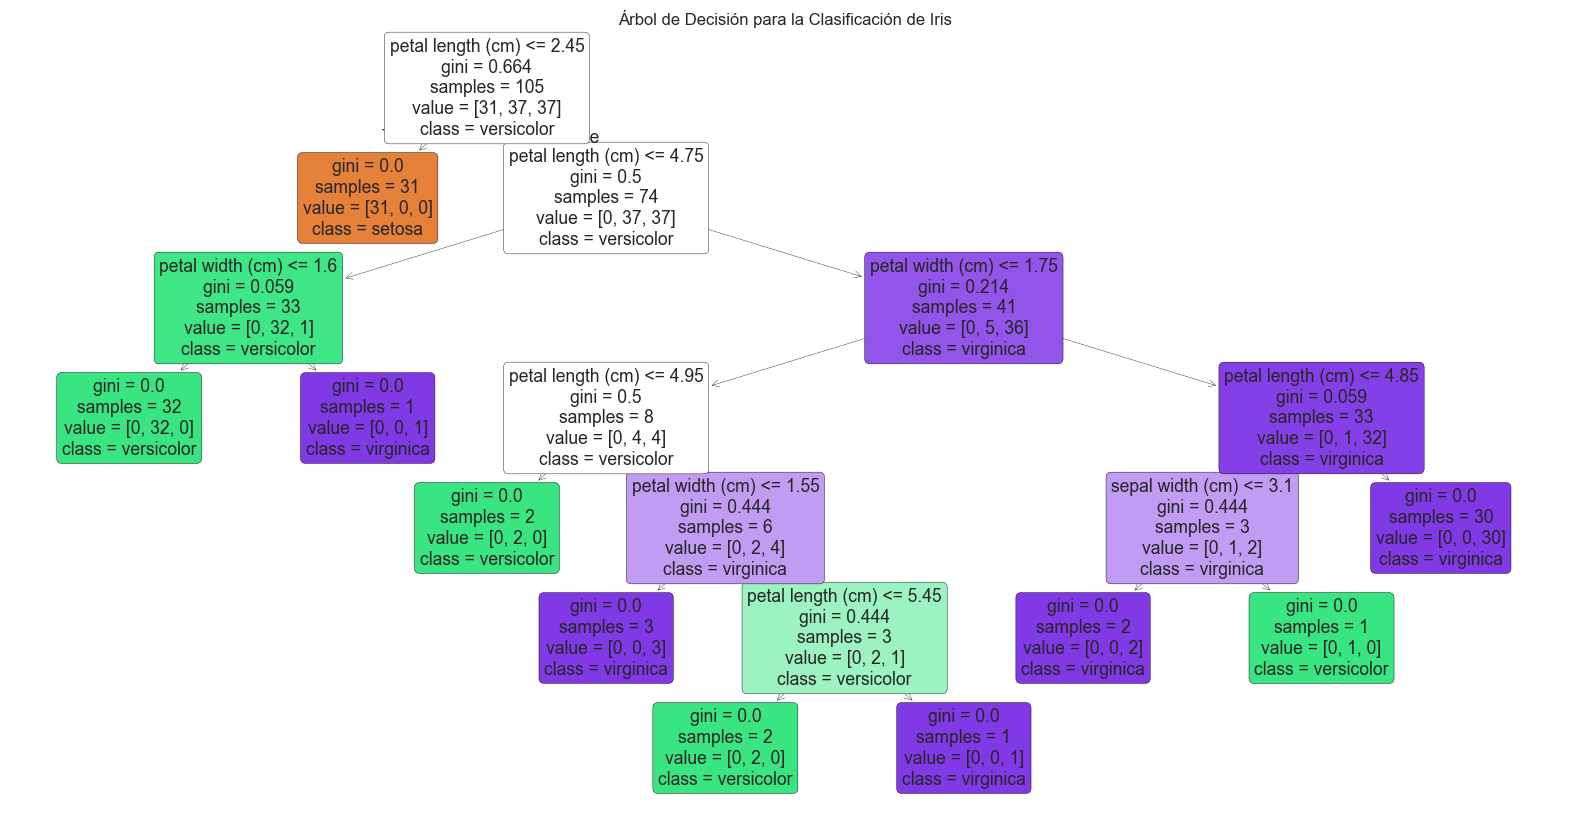

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(tree_clf, 
          feature_names=feature_names, 
          class_names=target_names, 
          filled=True, 
          rounded=True)
plt.title("Árbol de Decisión para la Clasificación de Iris")
plt.show()

**Interpretando el gráfico:**
- **petal length (cm) <= 2.45**: Esta es la primera pregunta en el nodo raíz.
- **gini = 0.667**: La impureza en el nodo raíz es alta.
- **samples = 105**: El número de muestras de entrenamiento en este nodo.
- **value = [35, 34, 36]**: La distribución de las clases en este nodo.
- **class = setosa**: La clase mayoritaria en este nodo.

Si la longitud del pétalo es menor o igual a 2.45 cm, el árbol predice 'setosa' con una pureza de Gini de 0.0 (¡un nodo puro!).

### 1.5 El Gran Problema: Overfitting y Poda <a id='1.5-overfitting'></a>

Si no ponemos límites, un árbol de decisión seguirá dividiendo los datos hasta que cada hoja sea perfectamente pura. Esto significa que se **aprenderá de memoria los datos de entrenamiento**, incluyendo el ruido. El resultado es un **overfitting masivo**.

**Solución**: **Regularizar** el árbol, lo que en este contexto se llama **poda (pruning)**. Podemos hacerlo de varias formas:

- `max_depth`: Limitar la profundidad máxima del árbol.
- `min_samples_split`: El número mínimo de muestras que debe tener un nodo para poder ser dividido.
- `min_samples_leaf`: El número mínimo de muestras que debe tener una hoja.
- `max_leaf_nodes`: Limitar el número total de hojas.

Controlar `max_depth` es la forma más común y efectiva de evitar el overfitting.

Árbol con max_depth=2:


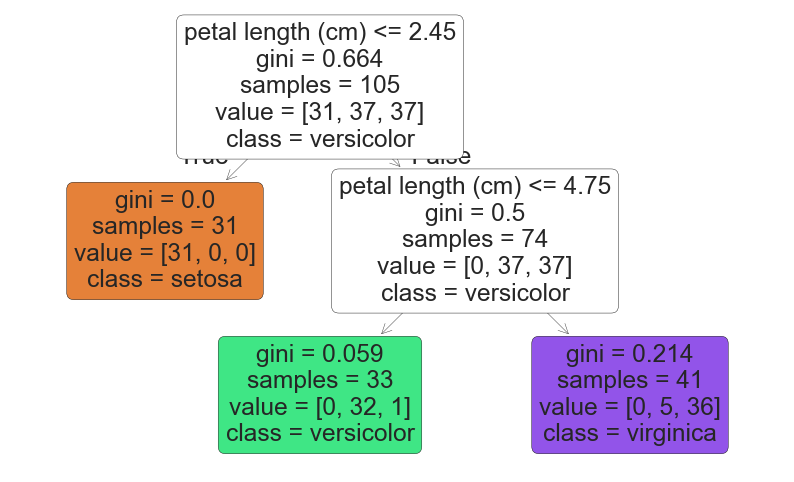


Accuracy del árbol original: 1.00
Accuracy del árbol podado (max_depth=2): 0.98


In [10]:
# Entrenar un árbol "podado" con una profundidad máxima de 2
tree_clf_pruned = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pruned.fit(X_train, y_train)

print("Árbol con max_depth=2:")
plt.figure(figsize=(10, 6))
plot_tree(tree_clf_pruned, feature_names=feature_names, class_names=target_names, filled=True, rounded=True)
plt.show()

y_pred_pruned = tree_clf_pruned.predict(X_test)
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
print(f"\nAccuracy del árbol original: {accuracy:.2f}")
print(f"Accuracy del árbol podado (max_depth=2): {accuracy_pruned:.2f}")

El modelo podado es mucho más simple y es probable que generalice mejor a datos nuevos, aunque en este caso particular el accuracy sea ligeramente menor.

### 1.6 Árboles de Regresión <a id='1.6-regresion'></a>

Los árboles también pueden usarse para regresión. La idea es la misma, pero en lugar de buscar la máxima ganancia de información, el árbol busca las divisiones que más **reducen el Error Cuadrático Medio (MSE)**.

La predicción en una hoja no es una clase, sino el **valor medio** de todas las muestras de entrenamiento que caen en esa hoja.

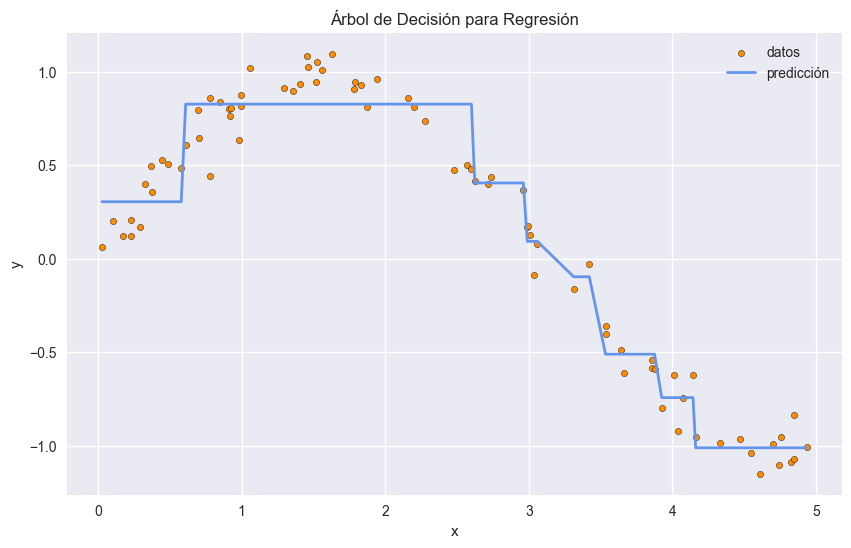

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Datos sintéticos para regresión
np.random.seed(42)
X_reg = np.sort(5 * np.random.rand(80, 1), axis=0)
y_reg = np.sin(X_reg).ravel() + np.random.randn(80) * 0.1

# Entrenar un árbol de regresión
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg.fit(X_reg, y_reg)

# Predecir y visualizar
y_pred_reg = tree_reg.predict(X_reg)

plt.figure(figsize=(10, 6))
plt.scatter(X_reg, y_reg, s=20, edgecolor="black", c="darkorange", label="datos")
plt.plot(X_reg, y_pred_reg, color="cornflowerblue", label="predicción", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Árbol de Decisión para Regresión")
plt.legend()
plt.show()

Observa cómo la predicción del árbol de regresión es una función escalonada. Cada "escalón" corresponde al valor medio de una hoja.

---

## 🤖 2. Support Vector Machines (SVM) <a id='2-svm'></a>

### 2.1 Intuición: El Hiperplano de Margen Máximo <a id='2.1-intuicion-svm'></a>

La idea central de las SVM es encontrar el **hiperplano** (una línea en 2D, un plano en 3D, etc.) que mejor separa las clases. ¿Y cuál es el "mejor" hiperplano? Aquel que tiene el **margen más grande**.

El **margen** es la distancia entre el hiperplano y las muestras más cercanas de cada clase. Estas muestras que tocan el margen se llaman **vectores de soporte (support vectors)**, y son las que definen el modelo.

![SVM Margin](imagenes/margenes.jpg)

La SVM es un clasificador de **margen máximo**. Esta intuición de maximizar la "calle" entre las clases hace que el modelo sea muy robusto y generalice bien.

### 2.2 Clasificadores de Margen Blando (Hiperparámetro C) <a id='2.2-margen-blando'></a>

El margen máximo (margen duro) tiene un problema: es muy sensible a los outliers y solo funciona si los datos son perfectamente separables linealmente.

La solución es el **margen blando**, que permite algunas **violaciones del margen**. Es decir, permite que algunas muestras estén dentro de la "calle" o incluso en el lado equivocado.

El hiperparámetro **`C`** controla este trade-off:
- **`C` bajo**: Margen más ancho, más violaciones permitidas. **Más regularización**, menos overfitting.
- **`C` alto**: Margen más estrecho, menos violaciones permitidas. **Menos regularización**, más riesgo de overfitting.

![SVM C parameter](imagenes/svmC.png)

Cada panel muestra un SVM lineal con un valor distinto de C usando el dataset Iris:

C = 0.1: margen más ancho → más tolerancia a errores.

C = 1: equilibrio entre margen y precisión.

C = 10: margen más estrecho → el modelo se ajusta más a los datos.

### 2.3 Clasificación No Lineal: El Truco del Kernel <a id='2.3-kernel'></a>

¿Qué pasa si los datos no son separables por una línea?

![Datos no lineales](imagenes/nolineales.png)

La imagen muestra cómo cambia la frontera de decisión del SVM con kernel RBF según el valor de C:

C = 0.1: el modelo busca un margen amplio, la frontera es más suave (más sesgo, menos varianza).

C = 1: equilibrio entre suavidad y ajuste.

C = 10: el modelo se ajusta fuertemente a los datos (margen estrecho, mayor riesgo de sobreajuste).

Aquí es donde las SVM brillan, gracias al **truco del kernel (kernel trick)**.

**Idea**: Proyectar los datos a una **dimensión superior** donde SÍ sean linealmente separables.

Imagina que añades una nueva característica, $z = x^2 + y^2$. En este nuevo espacio 3D, los datos que antes formaban un círculo ahora pueden ser separados por un plano.

El "truco" es que las SVM pueden calcular esta separación en el espacio de alta dimensión **sin tener que calcular explícitamente las nuevas coordenadas**, lo que es computacionalmente muy eficiente.

**Kernels más comunes:**
- **`linear`**: Para datos linealmente separables.
- **`poly`**: Kernel polinómico, bueno para datos con curvatura.
- **`rbf` (Radial Basis Function)**: El más popular y potente. Puede crear límites de decisión muy complejos. Tiene un hiperparámetro **`gamma`**:
  - `gamma` bajo: Influencia lejana, límite más suave.
  - `gamma` alto: Influencia cercana, límite más ajustado (riesgo de overfitting).

### 2.4 Implementación de SVM con Kernels <a id='2.4-implementacion-svm'></a>

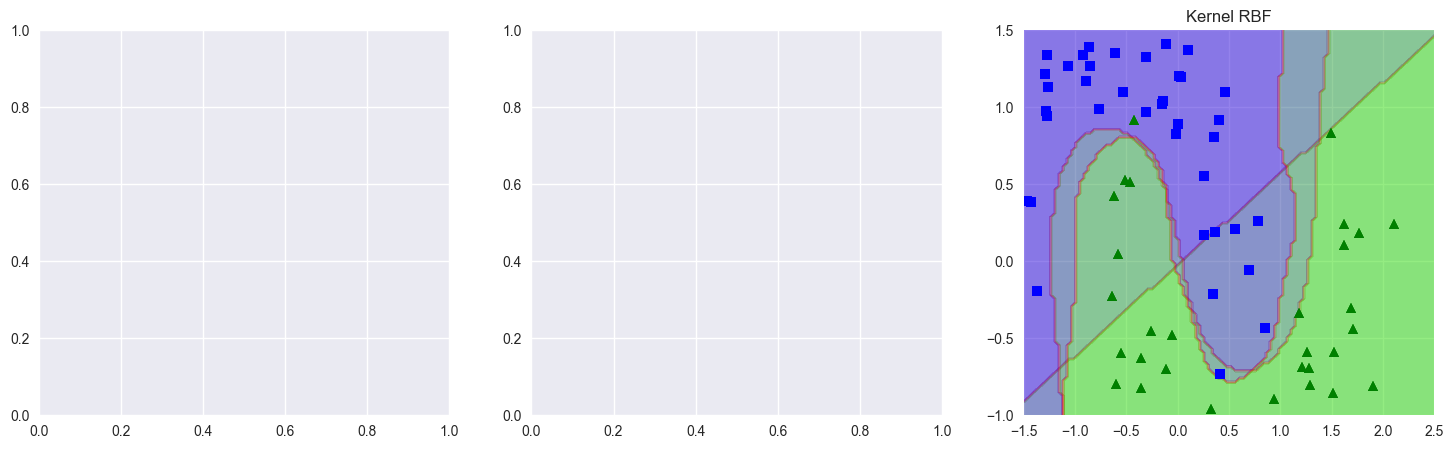

In [12]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

# Generar datos no lineales (dos lunas)
X_moon, y_moon = make_moons(n_samples=100, noise=0.15, random_state=42)

# Escalar los datos es crucial para las SVM
scaler = StandardScaler()
X_moon_scaled = scaler.fit_transform(X_moon)

# Crear modelos SVM con diferentes kernels
svm_linear = SVC(kernel="linear", C=1, random_state=42)
svm_poly = SVC(kernel="poly", degree=3, C=5, coef0=1, random_state=42)
svm_rbf = SVC(kernel="rbf", gamma=5, C=1, random_state=42)

svm_linear.fit(X_moon_scaled, y_moon)
svm_poly.fit(X_moon_scaled, y_moon)
svm_rbf.fit(X_moon_scaled, y_moon)

# Función para visualizar los límites de decisión
def plot_decision_boundary(clf, X, y, axes, title):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X_new).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.title(title)
    plt.axis(axes)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
plot_decision_boundary(svm_linear, X_moon_scaled, y_moon, [-1.5, 2.5, -1, 1.5], "Kernel Lineal")
plot_decision_boundary(svm_poly, X_moon_scaled, y_moon, [-1.5, 2.5, -1, 1.5], "Kernel Polinómico")
plot_decision_boundary(svm_rbf, X_moon_scaled, y_moon, [-1.5, 2.5, -1, 1.5], "Kernel RBF")

plt.show()

**Observaciones:**
- El **kernel lineal** falla estrepitosamente, como era de esperar.
- El **kernel polinómico** hace un trabajo decente.
- El **kernel RBF** se ajusta perfectamente a la forma no lineal de los datos. ¡Este es el poder del truco del kernel!

### 2.5 SVM para Regresión (SVR) <a id='2.5-svr'></a>

Las SVM también se pueden usar para regresión. La idea se invierte:

- En lugar de encontrar la "calle" más ancha que **separa** las clases, la SVR intenta encontrar la calle más ancha que **contenga** la mayor cantidad de puntos posible.
- El ancho de la calle se controla con un hiperparámetro `epsilon` (ε).
- Los puntos fuera de la calle son los que contribuyen al error.

![SVR](imagenes/svg.png)

Este gráfico muestra cómo cambia el comportamiento de un SVR con kernel RBF al variar el parámetro C:

* C = 0.1: curva muy suave, el modelo no se ajusta tanto (alta tolerancia al error).

* C = 1: equilibrio entre suavidad y ajuste.

* C = 10: el modelo se ajusta más fuertemente a los datos (menor margen, más riesgo de sobreajuste).

---

## ⚖️ 3. Ventajas y Desventajas: Árboles vs. SVM <a id='3-comparativa'></a>

| Característica | Árboles de Decisión | Support Vector Machines (SVM) |
| :--- | :--- | :--- |
| **Interpretabilidad** | ✅ **Muy alta**. Se pueden visualizar y explicar. | ❌ **Baja** (especialmente con kernels). Es una caja negra. |
| **Escalado de Datos** | No requiere escalado. | ✅ **Requiere escalado** (ej. StandardScaler). |
| **Rendimiento** | Bueno, pero propenso a overfitting si no se poda. | ✅ **Excelente**, especialmente en espacios de alta dimensión. |
| **Velocidad** | Rápido para entrenar y predecir. | Puede ser lento de entrenar en datasets muy grandes. |
| **No Linealidad** | Captura interacciones no lineales de forma natural. | ✅ Captura relaciones no lineales muy complejas con kernels. |
| **Parámetros** | Intuitivos (`max_depth`, etc.). | Menos intuitivos (`C`, `gamma`, `epsilon`). |

---

## 📝 4. Resumen y Próximos Pasos <a id='4-resumen'></a>

### 🎉 ¡Has añadido dos potentes herramientas no lineales a tu arsenal!

#### ✅ Lo que has aprendido:

1. **Árboles de Decisión**
   - A construir modelos que imitan el razonamiento humano con reglas de "si... entonces...".
   - La importancia de la **poda** (ej. `max_depth`) para evitar que el árbol se aprenda los datos de memoria (overfitting).
   - Que los árboles se pueden usar tanto para **clasificación** como para **regresión**.

2. **Support Vector Machines (SVM)**
   - La poderosa idea de encontrar el **hiperplano de margen máximo**.
   - Cómo el **truco del kernel** permite a las SVM resolver problemas no lineales complejos proyectando los datos a dimensiones superiores.
   - La importancia de los hiperparámetros `C` (regularización) y `gamma` (influencia del kernel RBF).

---

### 🚀 Próximo Módulo: Métodos de Ensamblado - Random Forest

Los árboles de decisión son geniales, pero un solo árbol puede ser inestable y propenso a errores. ¿Qué pasaría si en lugar de confiar en un solo "experto", le preguntamos a un **bosque entero** de expertos y nos quedamos con la opinión mayoritaria?

Esa es la idea detrás de los **Métodos de Ensamblado (Ensemble Methods)**. En el próximo módulo, explorarás uno de los algoritmos más potentes y populares en Machine Learning:

- **Random Forest**: Un ensamblado de muchos árboles de decisión que corrige los errores individuales y produce un modelo increíblemente robusto y preciso.

**Has aprendido a construir un árbol. Ahora, ¡vamos a plantar un bosque!**